In [1]:
import pandas as pd
DOCUMENT_URL = 'https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html'

air_quality = pd.read_csv("data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [4]:
# 查看 city 列中不重复的值
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [5]:
air_quality["datetime"]

0       2019-06-21 00:00:00+00:00
1       2019-06-20 23:00:00+00:00
2       2019-06-20 22:00:00+00:00
3       2019-06-20 21:00:00+00:00
4       2019-06-20 20:00:00+00:00
                  ...            
2063    2019-05-07 06:00:00+00:00
2064    2019-05-07 04:00:00+00:00
2065    2019-05-07 03:00:00+00:00
2066    2019-05-07 02:00:00+00:00
2067    2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: object

In [7]:
# 使用pandas datetime属性
# 我想用datetime列中的日期作为datetime对象而不是纯文本
# In pandas we call these datetime objects similar to datetime.datetime from the standard library as pandas.Timestamp.
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [8]:
# pandas 的输入函数如 pandas.read_csv() 和 pandas.read_json() 
# 可以在读取数据时使用 parse_dates 参数 和 一个要转换为时间戳的列的列表来进行日期转换:
# pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])

In [9]:
# 我们正在处理的时间序列数据集的 开始 和 结束 日期是什么?
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [11]:
# 我们可以用这个来得到时间序列的长度:
air_quality["datetime"].max() - air_quality["datetime"].min()  # pandas.Timedelta 

Timedelta('44 days 23:00:00')

In [12]:
# 我想在 DataFrame 中添加一个新列，该列只包含测量的月份
air_quality["month"] = air_quality["datetime"].dt.month
air_quality

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5


In [21]:
# NO2 在每周的每个工作日，各个测量地点的平均浓度浓度是多少?（如 BETR801 地点 每个周一的平均值，每个周二的平均值...）
air_quality.groupby(
    [air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

In [30]:
# BETR801 地点 每个周一（.dt.weekday==0）的平均值
air_quality[(air_quality["datetime"].dt.weekday==0) & (air_quality["location"]=="BETR801")]["value"].mean()

27.875

Text(0, 0.5, '$NO_2 (µg/m^3)$')

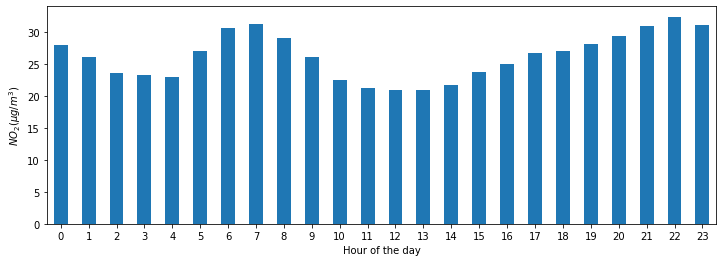

In [50]:
# 在给定的数据集上，每个小时的平均值。（如：把 数据集上的日期范围内的 每一天的 0点 的值加在一起，取平均值）
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Hour of the day")  # custom x label using matplotlib
plt.ylabel("$NO_2 (µg/m^3)$")

In [56]:
air_quality.datetime.is_unique

False

In [54]:
# Datetime作为索引
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


In [53]:
no_2.index.is_unique

True

In [57]:
no_2.index.unique()

DatetimeIndex(['2019-05-07 01:00:00+00:00', '2019-05-07 02:00:00+00:00',
               '2019-05-07 03:00:00+00:00', '2019-05-07 04:00:00+00:00',
               '2019-05-07 05:00:00+00:00', '2019-05-07 06:00:00+00:00',
               '2019-05-07 07:00:00+00:00', '2019-05-07 08:00:00+00:00',
               '2019-05-07 09:00:00+00:00', '2019-05-07 10:00:00+00:00',
               ...
               '2019-06-20 15:00:00+00:00', '2019-06-20 16:00:00+00:00',
               '2019-06-20 17:00:00+00:00', '2019-06-20 18:00:00+00:00',
               '2019-06-20 19:00:00+00:00', '2019-06-20 20:00:00+00:00',
               '2019-06-20 21:00:00+00:00', '2019-06-20 22:00:00+00:00',
               '2019-06-20 23:00:00+00:00', '2019-06-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=1033, freq=None)

In [58]:
# 使用 datetime 索引，我们不需要用 dt 访问器来获得时间序列的属性，可以直接在索引上使用这些属性
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

<AxesSubplot:xlabel='datetime'>

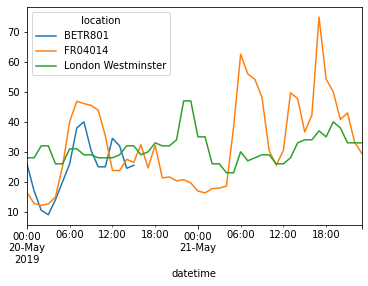

In [59]:
# 将5月20日至5月21日不同站点的NO2数值绘制成一张图表
no_2["2019-05-20":"2019-05-21"].plot()  # 可以在 DatetimeIndex 上选择特定的数据子集。

In [60]:
# 将时间序列重新采样到另一个频率
# 统计每个站点的月最大值。
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [64]:
# BETR801 地点 5月 的最大值
air_quality[(air_quality["datetime"].dt.month==5) & (air_quality["location"]=="BETR801")]["value"].max()

74.5

In [65]:
# 当对时间序列设置了频率后，时间序列的频率由 freq 属性提供:
monthly_max.index.freq

<MonthEnd>